In [95]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from yellowbrick.regressor import PredictionError, ResidualsPlot
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.datasets import load_diabetes
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from yellowbrick.features import JointPlotVisualizer
sns.set_theme()

In [52]:
banking = pd.read_csv('SRC/banking.csv')

In [50]:
'''fico= np.array(banking['fico_range'])

fico_range = []
for x in fico:
    fico_range.append(x.split('-'))

fico_range = pd.DataFrame(fico_range)'''

"fico= np.array(banking['fico_range'])\n\nfico_range = []\nfor x in fico:\n    fico_range.append(x.split('-'))\n\nfico_range = pd.DataFrame(fico_range)"

In [49]:
'''fico_range = []
for x in fico:
    fico_range.append(x.split('-'))

fico_range = pd.DataFrame(fico_range)'''

"fico_range = []\nfor x in fico:\n    fico_range.append(x.split('-'))\n\nfico_range = pd.DataFrame(fico_range)"

In [47]:
#fico_range.iloc[:, 0]

In [48]:
#banking["fico_lower"] = fico_range.iloc[:, 0]
#banking["fico_upper"] = fico_range.iloc[:, 1]

In [53]:
banking['fico_average'] = banking['fico_range'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2)
banking.drop('fico_range', axis=1, inplace=True)
banking.head()

,interest_rate,amount_requested,amount_funded_by_investors,loan_length,fico_average
0,8.90,20000.0,20000.0,36.0,737.0
1,12.12,19200.0,19200.0,36.0,717.0
2,21.98,35000.0,35000.0,60.0,692.0
3,9.99,10000.0,9975.0,36.0,697.0
4,11.71,12000.0,12000.0,36.0,697.0


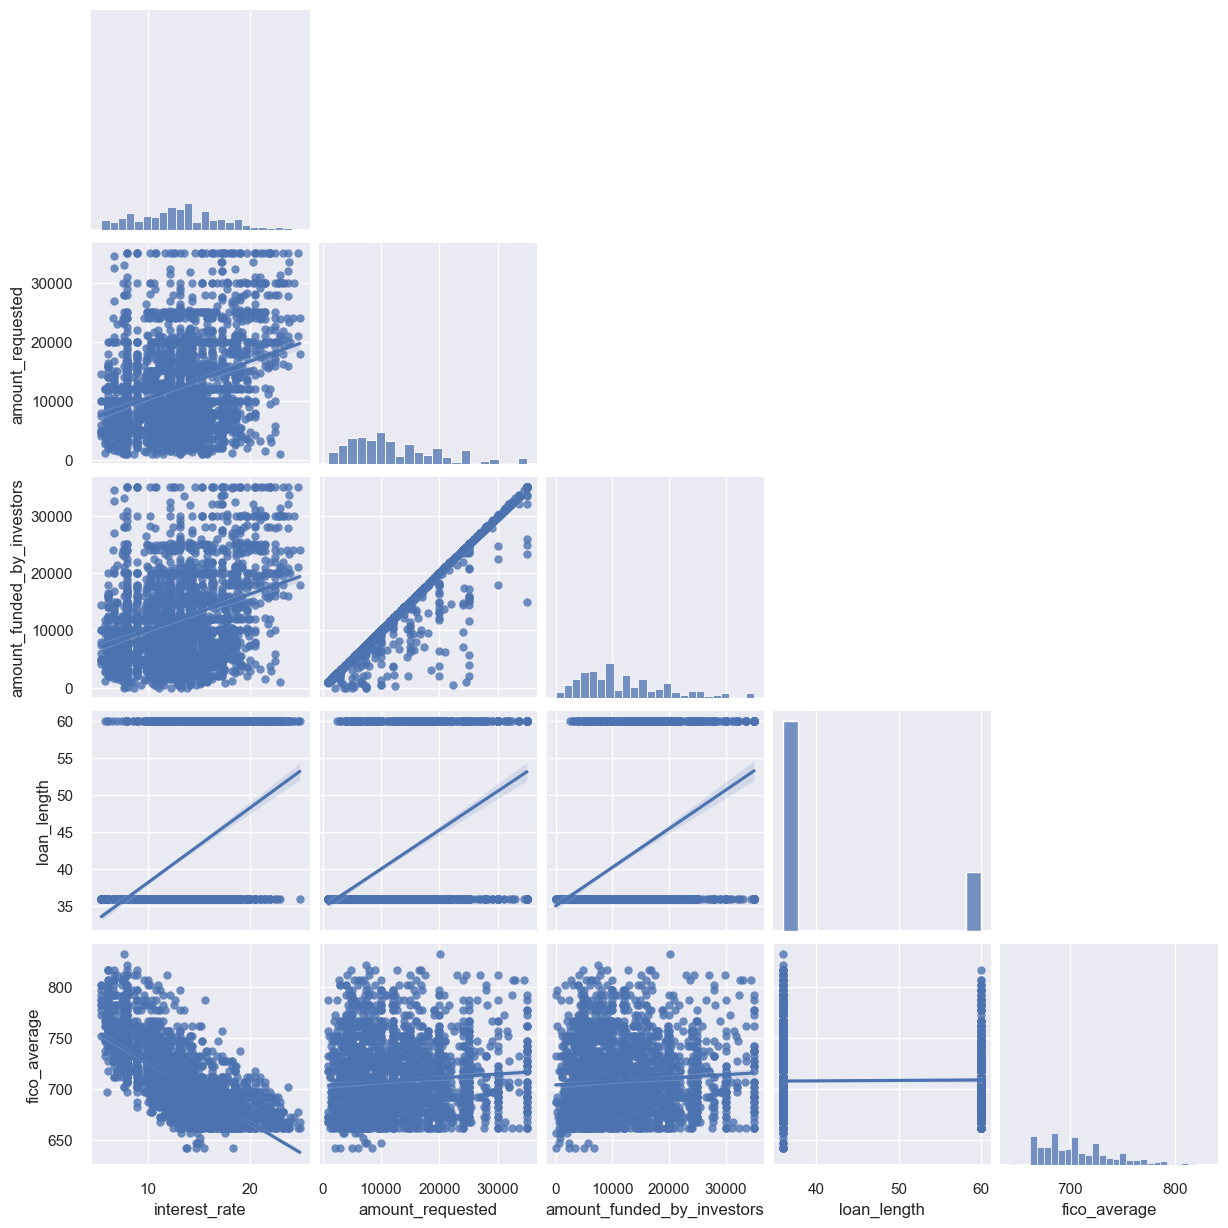

In [54]:
sns.pairplot(banking,kind='reg', corner=True)

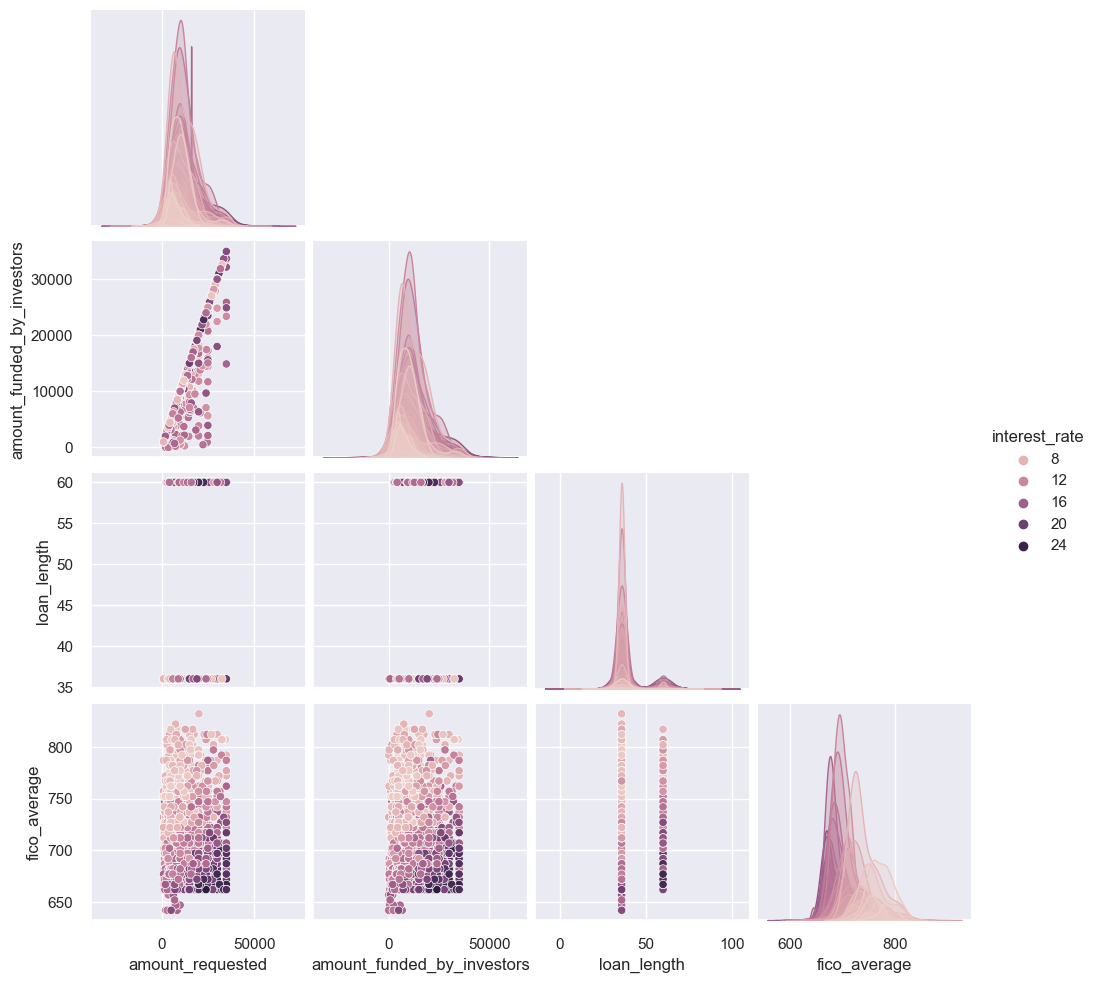

In [55]:
sns.pairplot(banking, hue='interest_rate', corner=True)

In [56]:
scaled = StandardScaler().fit_transform(banking)

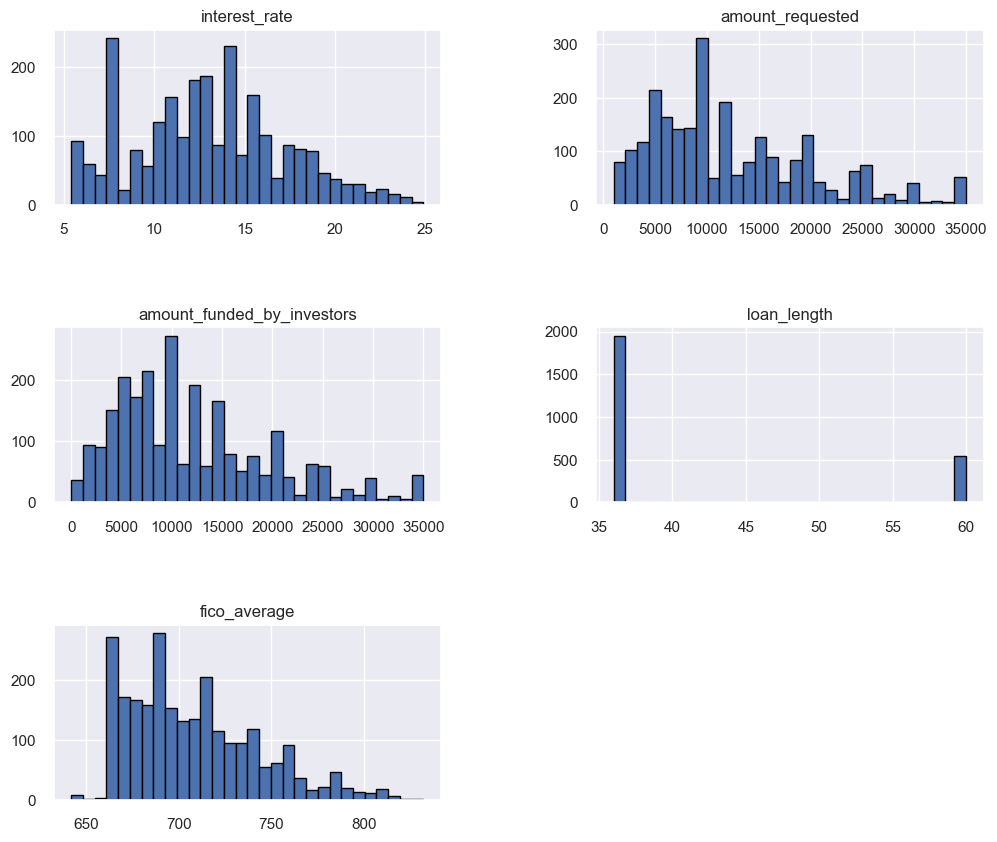

In [57]:
banking.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

<Axes: xlabel='interest_rate', ylabel='fico_average'>

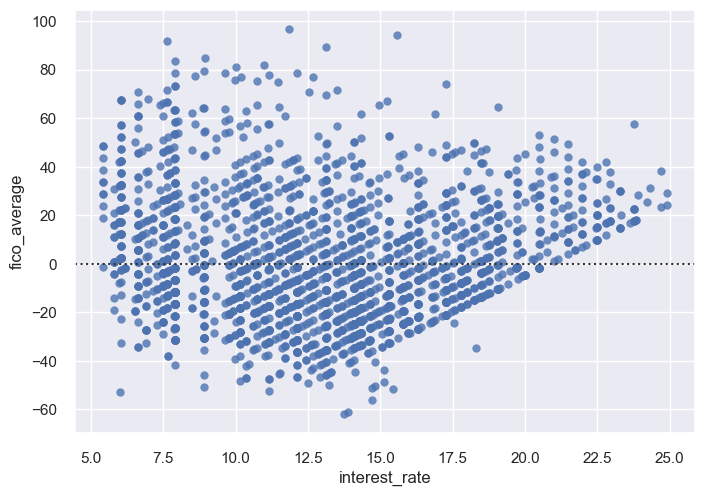

In [58]:
sns.residplot(data=banking, x='interest_rate', y='fico_average')

In [61]:
banking.head(0)

,interest_rate,amount_requested,amount_funded_by_investors,loan_length,fico_average


<Axes: xlabel='interest_rate', ylabel='amount_funded_by_investors'>

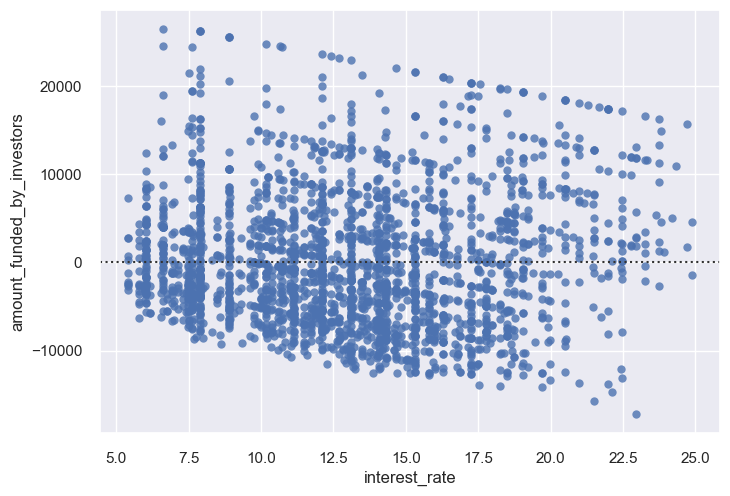

In [59]:
sns.residplot(data=banking, x='interest_rate', y='amount_funded_by_investors')

<Axes: xlabel='interest_rate', ylabel='amount_requested'>

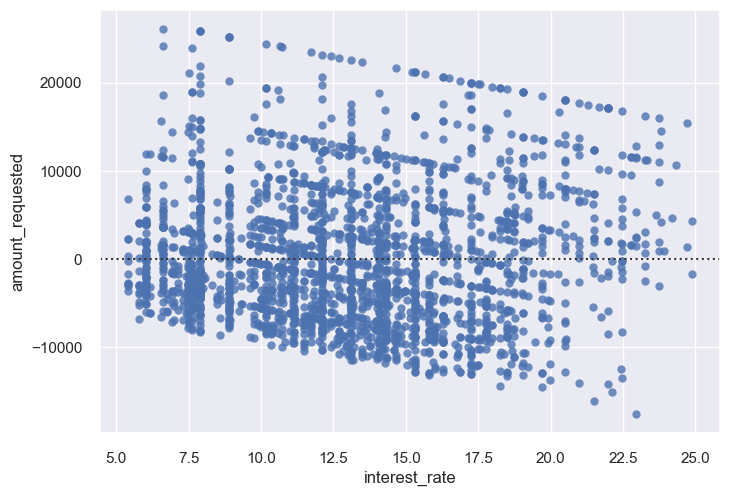

In [60]:
sns.residplot(data=banking, x='interest_rate', y='amount_requested')

In [106]:
X = banking[['amount_requested','amount_funded_by_investors','loan_length','fico_average']]
y = banking['interest_rate']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [108]:
funded_train = np.asarray(X_train['amount_funded_by_investors'])
requested_train = np.asarray(X_train['amount_requested'])
fico_train = np.asarray(X_train['fico_average'])
loan_ln_train = np.asarray(X_test['loan_length'])
funded_test = np.asarray(X_test['amount_funded_by_investors'])
reqested_test = np.asarray(X_test['amount_requested'])
fico_test = np.asarray(X_test['fico_average'])
loan_ln_test = np.asarray(X_test['loan_length'])

In [109]:
Linear_regression = make_pipeline(StandardScaler(), LinearRegression())
lasso_cv = make_pipeline(StandardScaler(), LassoCV())
ridge_cv = make_pipeline(StandardScaler(), RidgeCV())

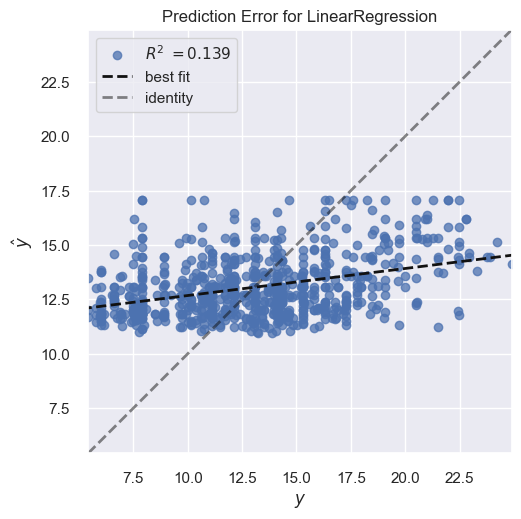

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [89]:
model1 = Linear_regression
visualizer = PredictionError(model1)
visualizer.fit(funded_train.reshape(-1, 1), y_train)  
visualizer.score(funded_test.reshape(-1, 1), y_test)  
visualizer.poof()

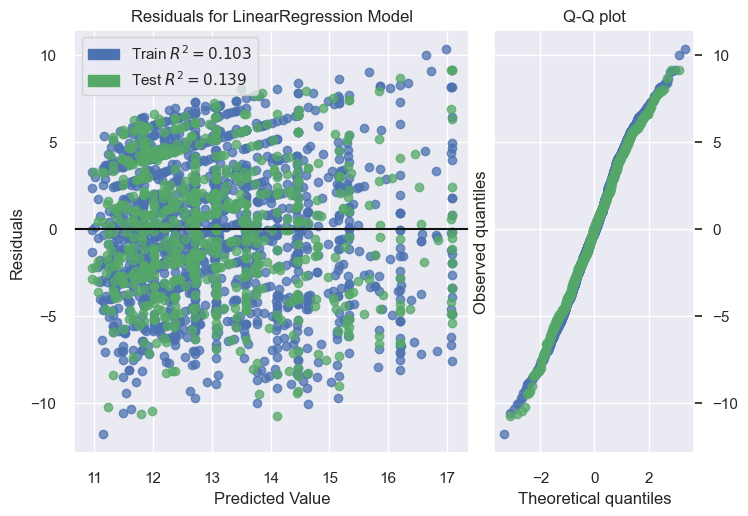

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [91]:
visualizer = ResidualsPlot(model1, hist=False, qqplot=True)
visualizer.fit(x_train1.reshape(-1, 1), y_train)  
visualizer.score(x_test1.reshape(-1, 1), y_test) 
visualizer.poof()

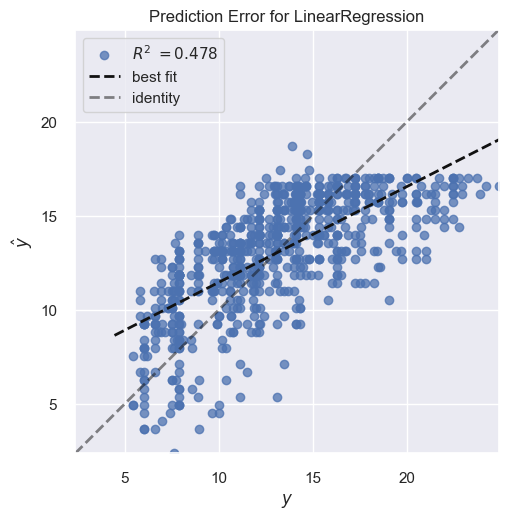

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [87]:
model1 = LinearRegression()
visualizer = PredictionError(model1)
visualizer.fit(x_train3.reshape(-1, 1), y_train)  
visualizer.score(x_test3.reshape(-1, 1), y_test)  
visualizer.poof()

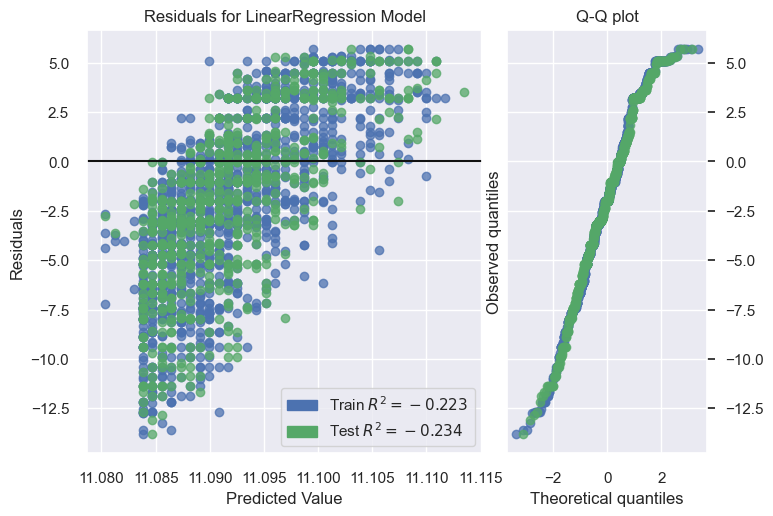

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [92]:
visualizer = ResidualsPlot(model1, hist=False, qqplot=True)
visualizer.fit(x_train3.reshape(-1, 1), y_train)  
visualizer.score(x_test3.reshape(-1, 1), y_test) 
visualizer.poof()

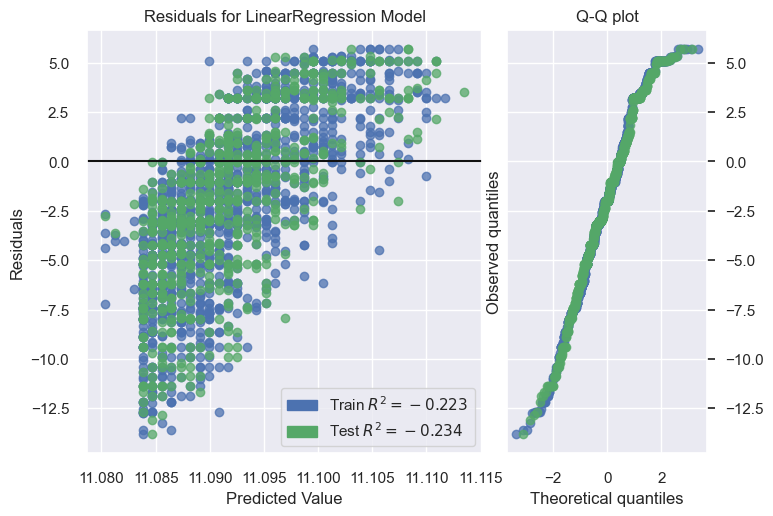

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [93]:
visualizer = ResidualsPlot(model1, hist=False, qqplot=True)
visualizer.fit(fico_train.reshape(-1, 1), y_train)  
visualizer.score(fico_test.reshape(-1, 1), y_test) 
visualizer.poof()

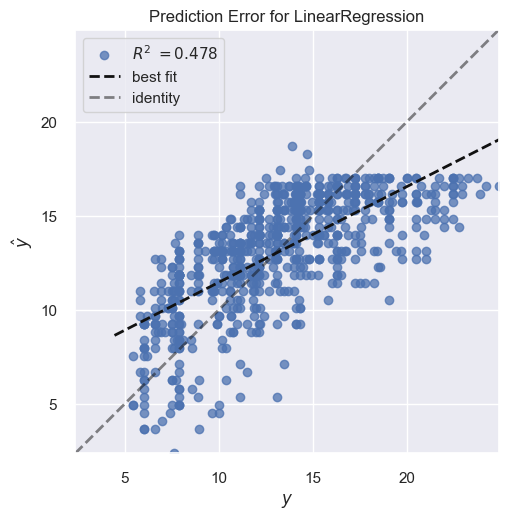

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [94]:
model1 = LinearRegression()
visualizer = PredictionError(model1)
visualizer.fit(fico_train.reshape(-1, 1), y_train)  
visualizer.score(fico_test.reshape(-1, 1), y_test) 
visualizer.poof()

In [121]:
# Lasso with 5 fold cross-validation
model = LassoCV(cv=10, random_state=40, max_iter=10000)

# Fit model
model.fit(X_train, y_train)

model.alpha_

lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)
print(list(zip(lasso_best.coef_, X)))
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))
print(mean_squared_error(y_test, lasso_best.predict(X_test)))

[(0.00012024447525656233, 'amount_requested'), (7.736334754424014e-05, 'amount_funded_by_investors'), (0.01482128373882917, 'loan_length'), (-0.08131108073667614, 'fico_average')]
R squared training set 67.16
R squared test set 67.62
5.526251466458341


In [120]:
model1 = RidgeCV(cv=10)

# Fit model
model1.fit(X_train, y_train)

model1.alpha_

ridge_best = Ridge(alpha=model1.alpha_)
ridge_best.fit(X_train, y_train)
print(list(zip(ridge_best.coef_, X)))

print('R squared training set', round(ridge_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(ridge_best.score(X_test, y_test)*100, 2))
print(mean_squared_error(y_test, ridge_best.predict(X_test)))

[(6.75588087676092e-05, 'amount_requested'), (6.745615123400568e-05, 'amount_funded_by_investors'), (0.13876592946739852, 'loan_length'), (-0.08777315160437936, 'fico_average')]
R squared training set 74.83
R squared test set 74.11
4.41867015790036


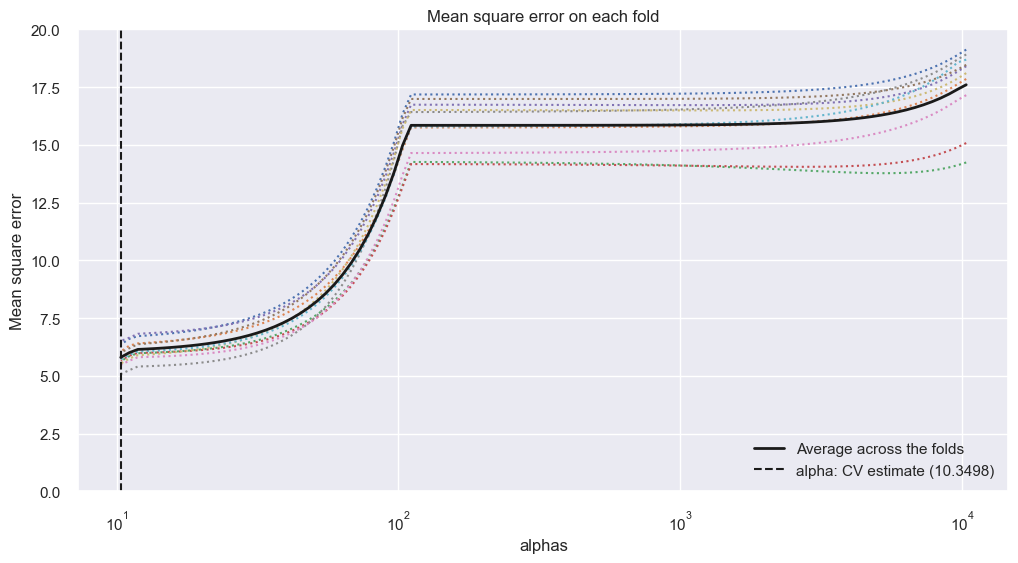

In [122]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.semilogx(model.alphas_, model.mse_path_, ":")

ax1.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
ax1.axvline(
    model.alpha_, linestyle="--", color="k", label=f"alpha: CV estimate ({model.alpha_:.4f})"
)

ax1.legend()
ax1.set_xlabel("alphas")
ax1.set_ylabel("Mean square error")
ax1.set_title("Mean square error on each fold")
ax1.axis("tight")

ymin, ymax = 0, 20
ax1.set_ylim(ymin, ymax);